In [407]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import cmath
import math
j = cmath.sqrt(-1)

In [363]:
#definition of useful matrices
pauliZ = 0.5*np.array([[1,0],[0,-1]], dtype=complex)
I = 1.0*np.array([[1,0],[0,1]], dtype=complex)
N=2

In [364]:
#generating array for Sz for particle k, all identity exect the kth position which is pauliZ
SkZgen = np.full((N,N,2,2),I, dtype=complex)
for i in range(N):
    SkZgen[i,i] = pauliZ

In [365]:
#creates array of SZ operators in Hilbert space of N particles
#The element of the array is which particle SZ acts on
SZ = np.zeros((N,2**N,2**N), dtype=complex)
for i in range(N):
    SiZgen = SkZgen[i]
    SjZ = SiZgen[0]
    for k in range(N-1):
        SjZ = np.kron(SjZ,SiZgen[k+1])
    SZ[i] = SjZ
print(SZ)

[[[ 0.5+0.j  0. +0.j  0. +0.j  0. +0.j]
  [ 0. +0.j  0.5+0.j  0. +0.j  0. +0.j]
  [ 0. +0.j  0. +0.j -0.5+0.j -0. +0.j]
  [ 0. +0.j  0. +0.j -0. +0.j -0.5+0.j]]

 [[ 0.5+0.j  0. +0.j  0. +0.j  0. +0.j]
  [ 0. +0.j -0.5+0.j  0. +0.j -0. +0.j]
  [ 0. +0.j  0. +0.j  0.5+0.j  0. +0.j]
  [ 0. +0.j -0. +0.j  0. +0.j -0.5+0.j]]]


In [366]:
#Define Hamiltonian 
B = 1
A = 5
sum = np.zeros((2**N,2**N))
for i in range(N-1):
    sum = sum + np.matmul(SZ[0],SZ[i+1])
H = B*SZ[0]+A*sum
print(H)

[[ 1.75+0.j  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j -0.75+0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j -1.75+0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j  0.75+0.j]]


In [367]:
#Diagonalize 
eng = np.real(la.eig(H)[0])
basis = la.eig(H)[1]
print(eng)
print(basis)

[ 1.75 -0.75 -1.75  0.75]
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


In [441]:
#Initial State (in Z basis)
psi = np.zeros([1,2**N], dtype=complex)
psi[0][0]=1
print(psi[0])

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [442]:
#Change to eigenbasis
#DO THIS ALEV

In [443]:
#Evolve
steps = 5
t = np.arange(steps)
psit = np.zeros([steps,1,2**N], dtype=complex)
for i in range(steps):
    for k in range(2**N):
        psit[i][0][k] = psi[0][k]*e**(-j*eng[k]*t[i])
print(psit)

[[[ 1.        +0.j          0.        +0.j
    0.        +0.j          0.        +0.j        ]]

 [[-0.17824606-0.98398595j  0.        +0.j
   -0.        +0.j          0.        +0.j        ]]

 [[-0.93645669+0.35078323j  0.        +0.j
    0.        -0.j          0.        +0.j        ]]

 [[ 0.51208548+0.85893449j -0.        +0.j
    0.        +0.j          0.        -0.j        ]]

 [[ 0.75390225-0.6569866j  -0.        +0.j
    0.        +0.j          0.        -0.j        ]]]


In [444]:
#expectation value of SZ0
ESZ0 = np.zeros(steps)
for i in range(steps):
    psitTran = np.transpose(psit[i])
    psitCon = np.conjugate(psit[i])
    a =np.matmul(SZ[0],psitTran, dtype=complex)
    ESZ0[i] = np.real(np.matmul(psitCon,a, dtype=complex))
print(ESZ0)


[0.5 0.5 0.5 0.5 0.5]


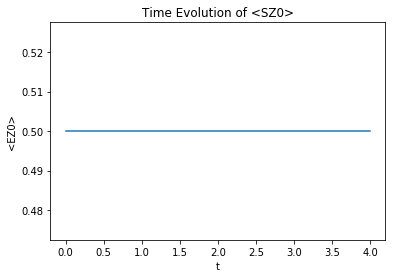

In [445]:
plt.plot(t,ESZ0)
plt.title('Time Evolution of <SZ0>')
plt.ylabel("<EZ0>")
plt.xlabel("t")
plt.show()